In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from code.python.mpmath_integration import quad_phi

from mpmath import mp

In [78]:
x = mp.mpf('1/2')
alpha = mp.mpf('25')
beta = mp.mpf('-5/2')
mu = mp.mpf('1/4')
delta = mp.mpf('34')

xmu = x - mu
xmu

mpf('0.25')

In [92]:
# %%time
mp_result = quad_phi(x, alpha, beta, mu, delta, digits=300)
mp_result

mpf('0.9991346290874023894742607445647736025391748602398807612138850817831596015237046324261791173922614468304')

Real integration

In [4]:
mp.dps = 200

In [83]:
gamma = mp.sqrt(alpha**2 - beta**2)
C = mp.exp(delta * gamma) / mp.pi

In [84]:
def f(t):
    r = t**2 + alpha ** 2
    v = mp.sqrt(r)
    s = v - beta

    return t * mp.exp(-xmu * s) / v / s


int1 = mp.quad(lambda t: f(t) * mp.sin(delta * t), [0, mp.inf])
float(int1), float(1 - C * int1)

(-4.525363792295244e-06, inf)

Complex integration

In [7]:
int2 = mp.im(mp.quad(lambda t: f(t) * mp.exp(delta * t * 1j), [0, mp.inf]))
float(int2)

-6.816274706490717e-12

Steepest descent

In [8]:
d1 = delta * gamma
d2 = delta * alpha

d1, d2

(mpf('348.24560298731698415706793735042210181234429728688212769116162534223088747394960390442855690847051834523631857420038294218892117741004248537682911796969652896680176735700884667062641668427029467010527697'),
 350)

In [9]:
mp.dps = 100

int3 = 1j / delta  * mp.quad(lambda q: f(1j * q / delta) * mp.exp(-q), [delta * alpha, mp.inf])

float(mp.im(int3))

2.465163058577424e-153

In [10]:
float(1 - C * mp.im(int3))

0.9863277653676182

Direct integration

In [68]:
mp.dps = 100

def fc(q):
    r = alpha ** 2 - q ** 2 / delta ** 2
    v = mp.sqrt(r)
    s = v - beta

    return mp.exp(-xmu * s) / s / v

intc1 = -1/delta ** 2 * mp.quad(lambda q: fc(q) * q * mp.exp(-q), [delta * alpha, mp.inf])
float(mp.im(intc1)), intc1

(2.465163058577424e-153,
 mpc(real='1.624503664249145768372577702393344312339170109645901286211542956665569854518403722901117673314882939157e-153', imag='2.465163058577423801471648150954489088611503797481984325250427047393119609767690859664676811353083471734e-153'))

In [69]:
mp.dps = 100
print(mp_result)
print(1 - C * mp.im(intc1))

0.9863284897488181871051071342966903105808649256705838055926337399245139832394907206591606174053748878
0.9863277653676181836769656891091872477829137419617191884857639851550724964068826736232684959997544065


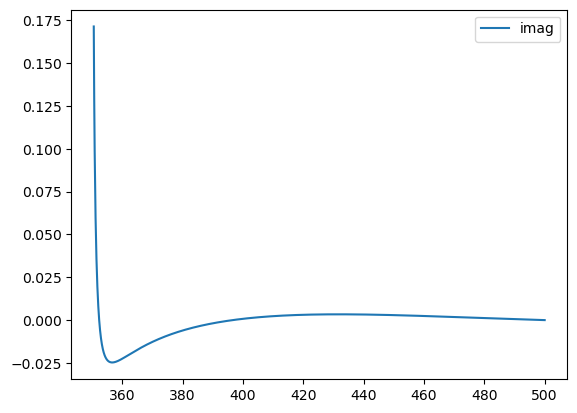

In [30]:
xx = np.linspace(delta * alpha + 1/2, 500, 1000)
fi = [ -1/delta ** 2 * q *  mp.im(fc(q)) for q in xx]
# fr = [mp.re(fc(q)) for q in xx]

# plt.plot(xx, fr, label='real')
plt.plot(xx, fi, label='imag')
plt.legend()
plt.show()

In [107]:
# %%time
mp.dps = 400

def fc(q):
    da = delta * alpha
    qp = q + da
    r = qp ** 2 / delta ** 2 - alpha ** 2
    v = mp.sqrt(r) * 1j
    s = v - beta
    
    return qp * mp.exp(-xmu * s - qp) / s / v

intc2 = -1/delta ** 2 * mp.quad(lambda q: fc(q), [0, mp.inf])

mp.dps = 15
intc2

mpc(real='5.8612824714895679e-371', imag='1.3627986426033715e-370')

In [108]:
mp.dps = 100
print(mp_result)
print(1 - C * mp.im(intc2))

0.9991346290874023894742607445647736025391748602398807612138850817831596015237046324261791173922614468
0.9991346290874023894742607445647736025391748602398807608660439362949348140959423396261913411884824248


Contour transformation

In [476]:
mp.dps = 200

In [477]:
int2 = mp.im(mp.quad(lambda t: f(t) * mp.exp(delta * t * 1j), [0, mp.inf]))
float(int2)

-6.816274706490717e-12

In [478]:
r1 = alpha * delta / mp.sqrt(delta **  2  + xmu ** 2) *1j
r1, float(mp.im(f(r1) * mp.exp(delta * r1 * 1j)))

(mpc(real='0.0', imag='24.996014983636117603904013578892196154489969464154884878312847350375417285944169759383150582769852073806727497653310940182898198945675361635668104668079430397696139285388427100236766989826010382670565865'),
 9.55359067806872e-152)

In [479]:
def g(t):
    r = t**2 + alpha ** 2
    v = mp.sqrt(r)
    s = v - beta

    return delta * t * 1j + mp.log(t) -xmu * s - mp.log(v) - mp.log(s)

def gp(t):
    r = t**2 + alpha ** 2
    v = mp.sqrt(r)
    s = v - beta
    
    return delta * 1j + 1/t - t / r - t / v / s - t * xmu / v

In [481]:
mp.dps = 100
float(mp.im(mp.quad(lambda t: f(t + r1) * mp.exp(delta * (t + r1) * 1j), [0, mp.inf])))

2.385225987629408e-153

In [488]:
mp.dps = 100
r2 = 24.932708519012949370j
int2 = mp.im(mp.quad(lambda t: mp.exp(g(t + r2)), [0, mp.inf]))
float(int2), float(mp.im(f(r2) * mp.exp(delta * r2 * 1j))), float(mp.im(gp(r2)))

(2.493605798645381e-153, 2.706584118721868e-152, 1.9912032784180164e-13)

In [489]:
xx = np.linspace(0, 10, 1000)
ff = [mp.im(mp.exp(g(t + r2))) for t in xx]
fo = [mp.im(mp.exp(g(t))) for t in xx]

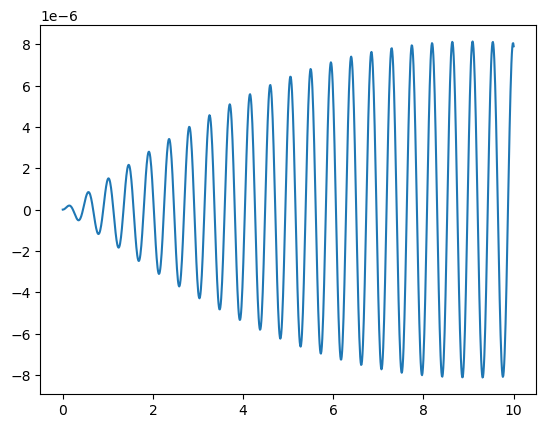

In [490]:
plt.plot(xx, fo)
plt.show()

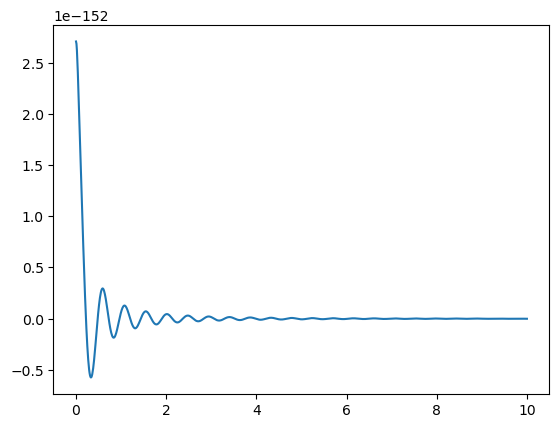

In [491]:
plt.plot(xx, ff)
plt.show()

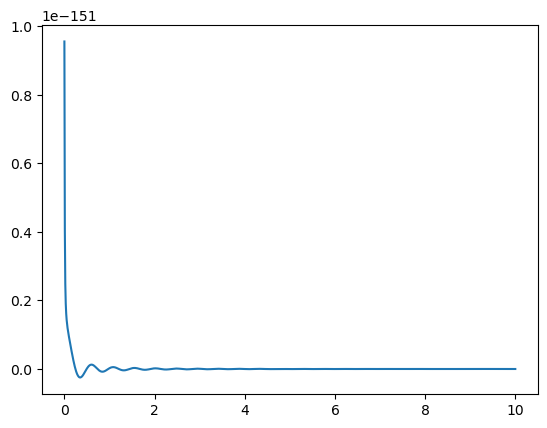

In [492]:
ff1 = [mp.im(f(t + r1) * mp.exp(delta * (t + r1) * 1j)) for t in xx]

# plt.plot(xx, ff)
plt.plot(xx, ff1)
plt.show()